# 선형대수학 알고리즘 코드 학습

## 기본 행연산 알고리즘

In [72]:
import numpy as np

M = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

# 기본 행연산
def E1(M, i, j):
    # 행렬 M의 i행과 j행을 바꾸는 연산
    A = M.copy()
    B = A[i].copy()
    A[i] = A[j].copy()
    A[j] = B

    return A

def E2(M, i, k):
    # M의 i행에 k 스칼라배 하는 기본행연산
    A = M.copy()
    A[i] = k*A[i]

    return A

def E3(M,i,j,k):
    # M의 i행에 j행의 k스칼라배 한 것을 더하는 기본행연산
    A = M.copy()
    A[i] += k*A[j]

    return A

print(M, end="\n --------------- \n")
print(E1(M,1,2), end="\n --------------- \n")
print(E2(M,1,3), end="\n --------------- \n")
print(E3(M,1,0,2), end="\n --------------- \n")

[[1 2 3]
 [4 5 6]
 [7 8 9]]
 --------------- 
[[1 2 3]
 [7 8 9]
 [4 5 6]]
 --------------- 
[[ 1  2  3]
 [12 15 18]
 [ 7  8  9]]
 --------------- 
[[ 1  2  3]
 [ 6  9 12]
 [ 7  8  9]]
 --------------- 


## Gauss-Jordan 소거법

In [73]:
def gauss_jordan_elimination(A):
    EA = A.copy()
    (n, m) = EA.shape
    iter_n = min(n,m) # 반복수행 횟수
    for j in range(0,iter_n):
        maxEl = 0
        maxRow = 0
        for i in range(j,n):
            if maxEl < EA[i,j]:
                maxEl = EA[i,j]
                maxRow = i
        if maxEl == 0:
            continue
        else:
            EA = E1(EA, j, maxRow)
            EA[j] = EA[j]/maxEl
        for k in range(0,n):
            if k != j:
                EA[k]=EA[k]-EA[k,j]*EA[j]
    x = EA[:,m-1]
    return EA, x

A = np.array([[2, 2, 4, 18],
              [1, 3, 2, 13],
              [3, 1, 3, 14]])
A = A.astype(float)
EA, x = gauss_jordan_elimination(A)

print(EA, x, sep="\n")



[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]]
[1. 2. 3.]


## LU분해

In [74]:
# LU분해
A = np.random.rand(3,3)

# dolittle algorithm
def LU_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = np.zeros([n, n])
    for i in range(0, n):
        for j in range(0, n):
            if i > j:
                L[i, j] = A[i, j]
                summ = 0
                for k in range(0, j):
                    summ += L[i, k] * U[k, j]
                L[i, j] = (L[i, j] - summ) / U[j, j]
            else:
                U[i, j] = A[i, j]
                summ = 0
                if i == 0:
                    pass
                else:
                    for k in range(0, i):
                        summ += L[i, k] * U[k, j]
                    U[i, j] -= summ
    return L, U

A = np.array([[5,3,2,1],
              [6,2,4,5],
              [7,4,1,3],
              [4,3,5,2]]).astype(float)
b = np.array([4,2,5,1]).reshape(4,1).astype(float)
L, U = LU_decomposition(A)
print(L , U , sep="\n")

# LU분해를 활용한 해와 비교
L.dot(U)
L_inv = np.linalg.inv(L)
y = L_inv.dot(b)
U_inv = np.linalg.inv(U)
x_LU = U_inv.dot(y)
print(x_LU)

A_inv = np.linalg.inv(A)
x = A_inv.dot(b)
print(x)

[[ 1.     0.     0.     0.   ]
 [ 1.2    1.     0.     0.   ]
 [ 1.4    0.125  1.     0.   ]
 [ 0.8   -0.375 -2.     1.   ]]
[[ 5.     3.     2.     1.   ]
 [ 0.    -1.6    1.6    3.8  ]
 [ 0.     0.    -2.     1.125]
 [ 0.     0.     0.     4.875]]
[[ 1.30769231]
 [-0.38461538]
 [-0.30769231]
 [-0.76923077]]
[[ 1.30769231]
 [-0.38461538]
 [-0.30769231]
 [-0.76923077]]


## 소행렬

In [75]:
A = np.array([[-4, 0, 2, -1, 0],
              [1, 3, -3, -1, 4],
              [2, 0, 1, 3, 0],
              [-2, 1, -3, -1, 5],
              [1, -5, 1, 0, 5]]).astype(float)

# 소행렬
def MinorMatrix(A, i, j):
    n = len(A)
    row_lst = list(range(n))
    col_lst = list(range(n))
    row_lst.remove(i)
    col_lst.remove(j)
    MinorAij = A[row_lst,:]
    MinorAij = MinorAij[:,col_lst]

    return MinorAij

def MinorMatrix2(A, i,j):
    n = len(A)
    M = np.zeros((n-1,n-1))
    for a in range(0,n-1):
        k = a if a < i else a+1
        for b in range(0,n-1):
            l = b if b < j else b+1
            M[a,b] = A[k,l]
    return M

## 행렬식

In [76]:
# 행렬식
def determinant(A):
    n = len(A)
    if n == 1 :
        return A[0,0]

    det = 0
    for j in range(n):
        minor_mat = MinorMatrix(A,0,j)
        det += ((-1)**(j))*A[0,j]*determinant(minor_mat)

    return det

def determinant2(A):
    if len(A) == 1:
        return A[0,0]
    if len(A) == 2:
        return A[0,0]*A[1,1]-A[0,1]*A[1,0]

    detVal=0
    for c in range(len(A)):
        minor_mat = MinorMatrix(A, 0, c)
        detVal+= ((-1)**(c))*A[0,c]*determinant2(minor_mat)
    return detVal

## 여인수 / 수반행렬

In [77]:
# 여인수
def cofactor(A, i, j):
    minor_mat = MinorMatrix(A,i,j)
    minor_det = determinant(minor_mat)
    co = ((-1)**(i+j))*minor_det

    return co

# 수반행렬
def adjointMatrix(A):
    n = len(A)
    adj_M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            adj_M[j,i] = cofactor(A,i,j)
    return adj_M

# 수반행렬을 이용한 역행렬 비교
A_inv = np.linalg.inv(A)
print(A_inv)

adjointMatrix(A).dot(A)
A_inv_adj = adjointMatrix(A)/determinant(A)
print(A_inv_adj)

[[-0.07321966  0.2106319  -0.03610832 -0.24573721  0.0772317 ]
 [ 0.16950853  0.26579739  0.09729188 -0.14343029 -0.06920762]
 [ 0.32397192  0.30090271  0.09127382 -0.35105316  0.11033099]
 [-0.05917753 -0.24072217  0.32698094  0.28084253 -0.08826479]
 [ 0.11935807  0.16349047  0.08625878 -0.02407222  0.09327984]]
[[-0.07321966  0.2106319  -0.03610832 -0.24573721  0.0772317 ]
 [ 0.16950853  0.26579739  0.09729188 -0.14343029 -0.06920762]
 [ 0.32397192  0.30090271  0.09127382 -0.35105316  0.11033099]
 [-0.05917753 -0.24072217  0.32698094  0.28084253 -0.08826479]
 [ 0.11935807  0.16349047  0.08625878 -0.02407222  0.09327984]]


## 크래머 공식

In [78]:
# 크래머 공식을 활용한 해구하기
A = np.array([[2,-1,5,1],
              [3,2,2,-6],
              [1,3,3,-1],
              [5,-2,-3,3]]).astype(float)
b = np.array([[-3],
              [-32],
              [-47],
              [49]]).astype(float)
def Cramer(A, b):
    n = len(A)
    x = np.zeros((n,1))
    for c in range(n):
        B = A.copy()
        for i in range(n):
            B[i,c]=b[i][0]
        x[c] = determinant(B)/determinant(A)

    return x
x = Cramer(A,b)
print(x)

[[  2.]
 [-12.]
 [ -4.]
 [  1.]]


## 두 벡터의 사잇각 구하기

In [79]:
def get_vector(mag, deg):
    v = np.zeros((2,1))
    v[0] = mag*np.cos(deg*np.pi/180)
    v[1] = mag*np.sin(deg*np.pi/180)

    return v

def get_mag_deg(vec):
    mag = np.sqrt(vec[0][0]**2+vec[1][0]**2)
    deg = np.arctan(vec[1][0]/vec[0][0])*(180/np.pi)
    return mag, deg

v1 = get_vector(100, 30)
v2 = get_vector(120, 60)
v3 = v1+v2

print(get_mag_deg(v3))


# 두 벡터의 사잇각
v = np.array([2,4,1]).reshape(3,1)
w = np.array([1,-1,3]).reshape(3,1)
def angle2vectors(v,w):
    norm_v = np.linalg.norm(v)
    norm_w = np.linalg.norm(w)
    cos_val = v.T.dot(w)/(norm_v*norm_w)
    angle = np.arccos(cos_val)*(180/np.pi)

    return angle

print(angle2vectors(v,w))

(212.56671821060448, 46.395392948206855)
[[86.22748926]]


## 두 벡터의 정사영

In [80]:
# 두 벡터의 정사영
v.T.dot(w)
angle2vectors(v,w)

# 정사영
def projection(v,w):
    # v의 w로의 정사영
    norm_w = np.linalg.norm(w)
    proj_w_v = (v.T.dot(w)/norm_w**2)*w

    return proj_w_v

print(projection(v,w))

[[ 0.09090909]
 [-0.09090909]
 [ 0.27272727]]


## 벡터의 삼중적

In [81]:
# 평육면체의 부피
# x dot ( y cross z)
A = np.array([1, 2, 3])
B = np.array([0, 5, 2])
C = np.array([2, 2, 4])
D = np.array([2, 4, 1])
AB = B-A
AC = C-A
AD = D-A

def tripleProduct(u,v,w):
    M = np.column_stack([u,v,w])
    val = np.linalg.det(M)

    return abs(val)

print(tripleProduct(AB,AD,AC))
print(abs(AB.dot(np.cross(AD,AC))))


9.000000000000002
9


## 점과 공간 사이의 거리

In [82]:
A = np.array([2,3,4])
W = np.array([1,2,3])
P = np.array([0,1,2])

def distPt2Pl(A,W,P):
    d = abs((P-A).dot(W)/np.linalg.norm(W))
    return d

print(distPt2Pl(A, W, P))

3.2071349029490928


## 이미지 변환

<ipython-input-83-2fdfcd6e9847>:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  src = im.imread("Cat.JPG")


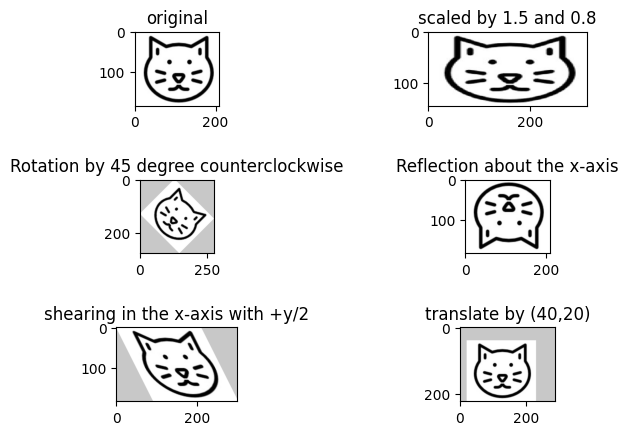

In [83]:
# 이미지 변환
import matplotlib.pyplot as plt
import imageio as im

def linear_transformation(src, a):
    M, N, _ = src.shape # M : y축 방향 크기, N : x축 방향 크기
    corners = np. array([[0,0,N-1,N-1], # 이미지 코너 좌표를 열벡터로 하는 행렬
                         [0, M-1,0,M-1]])
    new_points = a.dot(corners).astype(int) # 코너 위치의 선형변환 결과

    xcoord = new_points[0, :] # x축 좌표값
    ycoord = new_points[1, :] # y축 좌표값
    minx = np.amin(xcoord)
    maxx = np.amax(xcoord)
    miny = np.amin(ycoord)
    maxy = np.amax(ycoord)

    newN = maxx-minx+1 # 선형변환 후 x축 방향 이미지 크기
    newM = maxy-miny+1 # 선형변환 후 y축 방향 이미지 크기
    dest = np.full((newM, newN, 3), 200) # 출력 이미지 생성
    y = miny
    for i in range(newM):
        x=minx
        for j in range(newN):
            pts = np.array([[x],
                            [y]])

            # 출력 이미지의 (x,y) 위치에 대응하는 원본 이미지의 위치 계산
            # 역행렬 사용
            newpts = np.linalg.inv(a).dot(pts).round().astype(int)
            if (newpts[0] >=0 and newpts[0]< N and newpts[1] >=0 and newpts[1]<M):
                dest[i,j,:] = src[newpts[1], newpts[0],:]
            x = x+1
        y= y+1
    return dest

def translate(src, d):
    M, N, _ = src.shape
    steps = np.absolute(d)
    newM = M+2*steps[1]
    newN = N+2*steps[0]
    dest = np.full((newM, newN, 3), 200)
    for i in range(newM):
        for j in range(newN):
            yp = i-d[0]
            xp = j-d[1]
            if xp >= 0 and xp < N and yp >=0 and yp <M:
                dest[i,j,:] = src[yp, xp, :]
    return dest



src = im.imread("Cat.JPG")
plt.subplot(3,2,1)
plt.title("original")
plt.imshow(src)


#  x축 방향 1.5배 확대, y축 방향 0.8배 축소
a = np.array([[1.5,0],
              [0,0.8]])
dst = linear_transformation(src, a)
plt.subplot(3,2,2)
plt.title("scaled by 1.5 and 0.8")
plt.imshow(dst)

# 반시계방향으로 45도 회전
alpha = np.pi/4
a = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])
dst = linear_transformation(src, a)
plt.subplot(3,2,3)
plt.title("Rotation by 45 degree counterclockwise")
plt.imshow(dst)

#  x축 기준 반사
a = np.array([[1,0],
              [0,-1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,4)
plt.title("Reflection about the x-axis")
plt.imshow(dst)

# x축 방향으로 +y/2만큼 층밀림
a = np.array([[1,0.5],
              [0,1]])
dst = linear_transformation(src, a)
plt.subplot(3,2,5)
plt.title("shearing in the x-axis with +y/2")
plt.imshow(dst)

# x축 방향으로 40, y축 방향으로 20만큼 평행이동
dst = translate(src, [40,20])
plt.subplot(3,2,6)
plt.title("translate by (40,20)")
plt.imshow(dst)

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()


## 고윳값, 고유벡터

In [84]:
# 고윳값, 고유벡터
A = np.array([[2, 3],
              [3, -6]])
B = np.array([[5, 2, 0],
              [2, 5, 0],
              [-3, 4, 6]])
w1, V1 = np.linalg.eig(A)
w2, V2 = np.linalg.eig(B)

print(w1, V1)
print(w2, V2)


[ 3. -7.] [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]
[6. 7. 3.] [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


## 고윳값 분해

In [85]:
# 고윳값 분해
A = np.array([[3,1],
              [2,2]])
B = np.array([[1,1,0],
              [1,3,1],
              [2,-1,1]])

w, S = np.linalg.eig(A)
S_inv = np.linalg.inv(S)
D = np.diag(w)


print(S, D , S_inv, sep="\n")
print(S.dot(D).dot(S_inv))


[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
[[4. 0.]
 [0. 1.]]
[[ 0.94280904  0.47140452]
 [-0.74535599  0.74535599]]
[[3. 1.]
 [2. 2.]]


## 무어-펜로즈 의사 역행렬

In [87]:
# 무어-펜로즈 의사 역행렬
A = np.array([[1,1],
              [2,1],
              [3,1],
              [4,1]])
b = np.array([3.5, 4.3, 7.2, 8.0]).reshape(4,1)
C = np.array([[1,3,5],
              [1,1,0],
              [1,1,2],
              [1,3,3]])
d = np.array([3,5,7,-3]).reshape(4,1)
x = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)

print(x)


[[1.64]
 [1.65]]


## QR분해


In [88]:
# QR분해
Q, R = np.linalg.qr(C)
print(Q)
print(R)
print(Q.dot(R))


[[-0.5  0.5 -0.5]
 [-0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5  0.5]]
[[-2. -4. -5.]
 [ 0.  2.  3.]
 [ 0.  0. -2.]]
[[ 1.00000000e+00  3.00000000e+00  5.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -7.77156117e-16]
 [ 1.00000000e+00  1.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  3.00000000e+00]]


##  QR분해 활용 최적근사해

In [89]:
# QR분해 활용 최적근사해
Q,R = np.linalg.qr(C)
x = np.linalg.inv(R).dot(Q.T).dot(d)

print(x)

[[10.]
 [-6.]
 [ 2.]]


## 그람슈미트 과정

In [90]:
# 그람슈미트 과정
A = np.array([[3,1],
              [2,2]])
B = np.array([[1,1,0],
              [1,3,1],
              [2,-1,1]])
C = np.array([[1,1,1],
              [2,2,0],
              [3,0,0],
              [0,0,1]])

def gramSchmidt(A):
    basis = []
    for v in A.T:
        w = v - sum(np.dot(v,b)*b for b in basis)
        if (np.abs(w) > 1e-10).any():
            basis.append(w/np.linalg.norm(w))
    return np.array(basis).T

print(gramSchmidt(A))
print(gramSchmidt(B))
print(gramSchmidt(C))

[[ 0.83205029 -0.5547002 ]
 [ 0.5547002   0.83205029]]
[[ 0.40824829  0.20739034 -0.88900089]
 [ 0.40824829  0.82956136  0.38100038]
 [ 0.81649658 -0.51847585  0.25400025]]
[[ 2.67261242e-01  3.58568583e-01  5.96284794e-01]
 [ 5.34522484e-01  7.17137166e-01 -2.98142397e-01]
 [ 8.01783726e-01 -5.97614305e-01  2.06877846e-17]
 [ 0.00000000e+00  0.00000000e+00  7.45355992e-01]]


## 특잇값 분해

In [91]:
# 특잇값 분해
A = np.linspace(1,30,30).reshape((3,10))
AAT = A.dot(A.T)
ATA = A.T.dot(A)
e1, u = np.linalg.eig(AAT)
e2, v = np.linalg.eig(ATA)

U, S, VT = np.linalg.svd(A)

print(U, S, VT, sep="\n")

A=np.array([[-1,1,0],
            [0,-1,1]])

U, S, VT=np.linalg.svd(A)

print(U, S, VT, sep="\n")

[[-0.19101157  0.89266338  0.40824829]
 [-0.51371859  0.26348917 -0.81649658]
 [-0.8364256  -0.36568503  0.40824829]]
[9.69657342e+01 7.25578339e+00 5.43064394e-15]
[[-0.24139304 -0.25728686 -0.27318068 -0.2890745  -0.30496832 -0.32086214
  -0.33675595 -0.35264977 -0.36854359 -0.38443741]
 [-0.53589546 -0.42695236 -0.31800926 -0.20906617 -0.10012307  0.00882003
   0.11776313  0.22670623  0.33564933  0.44459242]
 [-0.71590327  0.22125777  0.35844894  0.23137425  0.12099174  0.27768425
  -0.35015608  0.05691924 -0.00338669 -0.19723014]
 [-0.03274747 -0.17891449 -0.37608172  0.89207072 -0.08211107 -0.11995167
   0.02920549 -0.06831525 -0.05443306 -0.00872147]
 [-0.07588946 -0.05763181 -0.30552732 -0.08865234  0.92223855 -0.12098055
  -0.00525156 -0.09919877 -0.09845351 -0.07065325]
 [ 0.06629874  0.08438747 -0.47449715 -0.0967393  -0.08248279  0.8362855
   0.03555043 -0.13520148 -0.138849   -0.09475243]
 [-0.33592049  0.16549299  0.06013546 -0.02444478 -0.06055817 -0.0839398
   0.85527901